<a href="https://colab.research.google.com/github/siddharth-kale/Twitter-Network-Analysis/blob/main/Topic%20Modelling%20of%20Tweets-NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install snscrape
!pip install unidecode
!pip install demoji
!pip install spacy
!pip install --upgrade gensim

     |████████████████████████████████| 235 kB 5.5 MB/s 
     |████████████████████████████████| 42 kB 726 kB/s 
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import datetime

import snscrape.modules.twitter as sntwitter

import re
import unidecode
import demoji

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
pd.options.display.max_rows=1000
pd.set_option("display.max_colwidth", None)

In [ ]:
username = 'nntaleb'
startdate='2011-09-01'
enddate = '2021-12-22'

In [ ]:
maxtweets = 5000000
tweetlist=[]
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:{} since:{} until:{}'.format(username,startdate,enddate)).get_items()):
   if i>maxtweets:
         break
   tweetlist.append(tweet)

tweets_df = pd.DataFrame(tweetlist)

In [ ]:
tweets_df 

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/nntaleb/status/1473400658187501577,2021-12-21 21:11:06+00:00,@antonio_cat_ 1 in 52!,1473400658187501577,nntaleb,[],,[],
1,https://twitter.com/nntaleb/status/1473381519980912649,2021-12-21 19:55:03+00:00,Assume equal odds. Guess? https://t.co/A4y0uf7gvY,1473381519980912649,nntaleb,[https://twitter.com/pickover/status/1473338362748674060],https://twitter.com/pickover/status/1473338362748674060,[https://t.co/A4y0uf7gvY],https://t.co/A4y0uf7gvY
2,https://twitter.com/nntaleb/status/1473346290734018567,2021-12-21 17:35:03+00:00,"Thanks to Dr @hjluks, past 12 weeks, &gt;3500 minutes of Zones &gt;2 (includes ~1000 min of Zones 3-5), ~ 2500 Zone 2 (this graph does not measure all walks). https://t.co/etki8SZkxa",1473346290734018567,nntaleb,[],,[],
3,https://twitter.com/nntaleb/status/1473312787686432770,2021-12-21 15:21:56+00:00,@TheBondFreak @graemeblake @prakharp19 @DrDamluji @IbeSaid Plus very very very slow walks.,1473312787686432770,nntaleb,[],,[],
4,https://twitter.com/nntaleb/status/1473310893899497477,2021-12-21 15:14:24+00:00,@alexandrosM @ektrit Go BS elsewhere.,1473310893899497477,nntaleb,[],,[],
...,...,...,...,...,...,...,...,...,...
31273,https://twitter.com/nntaleb/status/723935718528049152,2016-04-23 18:05:00+00:00,"@thelateempire The reason people use English is because Arabic feels strange, foreign, archaic, &amp; underdeveloped.",723935718528049152,nntaleb,[],,[],
31274,https://twitter.com/nntaleb/status/723934698003554304,2016-04-23 18:00:56+00:00,@thelateempire It is older!,723934698003554304,nntaleb,[],,[],
31275,https://twitter.com/nntaleb/status/723934077166854144,2016-04-23 17:58:28+00:00,2/ mitlma el telyene ballash bi-Dante 3eyzin 7ada yektub adab bil-shami.,723934077166854144,nntaleb,[],,[],
31276,https://twitter.com/nntaleb/status/723933405956599809,2016-04-23 17:55:48+00:00,"El3uroube wellgha el3arabiyye killa tezwir tari5e. El-shami ligha lawa7da bte2rab el-3arabe wel-arame, 3ayzin niktub kitub fiya latballesh.",723933405956599809,nntaleb,[],,[],


In [ ]:
sorted_tweets = tweets_df.sort_values(by='date',ascending=True).drop_duplicates(subset='content')
sorted_tweets

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
31277,https://twitter.com/nntaleb/status/723928018335371264,2016-04-23 17:34:24+00:00,"@saifedean @trishankkarthik Via negativa: stop the carbs (particularly sugar), fast, rather than all these pills.",723928018335371264,nntaleb,[],,[],
31276,https://twitter.com/nntaleb/status/723933405956599809,2016-04-23 17:55:48+00:00,"El3uroube wellgha el3arabiyye killa tezwir tari5e. El-shami ligha lawa7da bte2rab el-3arabe wel-arame, 3ayzin niktub kitub fiya latballesh.",723933405956599809,nntaleb,[],,[],
31275,https://twitter.com/nntaleb/status/723934077166854144,2016-04-23 17:58:28+00:00,2/ mitlma el telyene ballash bi-Dante 3eyzin 7ada yektub adab bil-shami.,723934077166854144,nntaleb,[],,[],
31274,https://twitter.com/nntaleb/status/723934698003554304,2016-04-23 18:00:56+00:00,@thelateempire It is older!,723934698003554304,nntaleb,[],,[],
31273,https://twitter.com/nntaleb/status/723935718528049152,2016-04-23 18:05:00+00:00,"@thelateempire The reason people use English is because Arabic feels strange, foreign, archaic, &amp; underdeveloped.",723935718528049152,nntaleb,[],,[],
...,...,...,...,...,...,...,...,...,...
4,https://twitter.com/nntaleb/status/1473310893899497477,2021-12-21 15:14:24+00:00,@alexandrosM @ektrit Go BS elsewhere.,1473310893899497477,nntaleb,[],,[],
3,https://twitter.com/nntaleb/status/1473312787686432770,2021-12-21 15:21:56+00:00,@TheBondFreak @graemeblake @prakharp19 @DrDamluji @IbeSaid Plus very very very slow walks.,1473312787686432770,nntaleb,[],,[],
2,https://twitter.com/nntaleb/status/1473346290734018567,2021-12-21 17:35:03+00:00,"Thanks to Dr @hjluks, past 12 weeks, &gt;3500 minutes of Zones &gt;2 (includes ~1000 min of Zones 3-5), ~ 2500 Zone 2 (this graph does not measure all walks). https://t.co/etki8SZkxa",1473346290734018567,nntaleb,[],,[],
1,https://twitter.com/nntaleb/status/1473381519980912649,2021-12-21 19:55:03+00:00,Assume equal odds. Guess? https://t.co/A4y0uf7gvY,1473381519980912649,nntaleb,[https://twitter.com/pickover/status/1473338362748674060],https://twitter.com/pickover/status/1473338362748674060,[https://t.co/A4y0uf7gvY],https://t.co/A4y0uf7gvY


In [ ]:
#Preprocessing Block

def preprocess_clean(block):

  #Remove Emojis
  text = demoji.replace(block,"")

  #Remove Hashtags
  text = re.sub(r'#\w+'," ",text)

  #Remove Account Mentions
  text = re.sub(r'@\w+'," ",text)

  #Remove Hyperlinks
  text = re.sub(r'http\S+'," ",text)

  #Remove non-Unicode characters
  text = unidecode.unidecode(text)

  #Remove symbols and other non-whitespace characters
  text = re.sub(r'[^\w\s]+'," ",text)

  #Remove Single characters
  text = re.sub(r'\b\w\b'," ",text)

  #Remove numbers
  text = re.sub(r'\d+\S'," ",text)

  #Remove \n character
  text = re.sub(r'\n+'," ",text)

  #Remove extra spaces
  text = re.sub(r'\s+'," ",text)

  return(text)


In [ ]:
tweet_contents = pd.DataFrame([sorted_tweets['content'].apply(preprocess_clean),sorted_tweets['date']]).transpose().reset_index().drop(columns='index')
tweet_contents.head(999)

,content,date
0,Via negativa stop the carbs particularly sugar fast rather than all these pills,2016-04-23 17:34:24+00:00
1,El roube wellgha el rabiyye killa tezwir tari El shami ligha lawa a bte ab el rabe wel arame yzin niktub kitub fiya latballesh,2016-04-23 17:55:48+00:00
2,mitlma el telyene ballash bi Dante yzin da yektub adab bil shami,2016-04-23 17:58:28+00:00
3,It is older,2016-04-23 18:00:56+00:00
4,The reason people use English is because Arabic feels strange foreign archaic amp underdeveloped,2016-04-23 18:05:00+00:00
5,La2 Sa id kl kan ma our billebnene Ana bilshami ye 3 el suriyye se r el mashre2 bima biyon el daffe elgharbiyye,2016-04-23 18:11:59+00:00
6,m bneshtghl aya,2016-04-23 18:12:21+00:00
7,Not lebantine just lebanese,2016-04-23 18:14:17+00:00
8,el wazze el sawda,2016-04-23 18:14:46+00:00
9,OK OK Killkun,2016-04-23 18:15:33+00:00


In [ ]:
#Accept only Nouns and remove Stop Words
stop_words = set(stopwords.words('english'))
tagger = spacy.load("en_core_web_sm")

def preprocess_language(block):

  #Lowercase
  text = block.lower()

  #Accept only Noun forms
  doc = tagger(text)
  final_block = ' '.join(token.text for token in doc if token.pos_ in ['NOUN','PROPN','X'] and token.text not in stop_words)

  return(final_block)

In [ ]:
processed_doc = pd.DataFrame(columns=['Date','Content'])
processed_doc['Content'] = tweet_contents['content'].apply(preprocess_language)
processed_doc['Date'] = tweet_contents['date']

In [ ]:
processed_doc = processed_doc[processed_doc['Content']!='']
processed_doc_int = processed_doc.reset_index().drop(columns='index')
processed_doc_int

,Date,Content
0,2016-04-23 17:34:24+00:00,negativa carbs sugar pills
1,2016-04-23 17:55:48+00:00,el roube wellgha el rabiyye killa tezwir tari el shami lawa bte ab el rabe wel arame yzin niktub kitub fiya latballesh
2,2016-04-23 17:58:28+00:00,mitlma el telyene ballash bi dante yzin da yektub adab bil shami
3,2016-04-23 18:05:00+00:00,reason people english archaic amp
4,2016-04-23 18:11:59+00:00,la2 sa kl kan billebnene ana bilshami ye el suriyye se r el mashre2 bima biyon el daffe elgharbiyye
...,...,...
28290,2021-12-21 15:13:53+00:00,details
28291,2021-12-21 15:14:24+00:00,bs
28292,2021-12-21 15:21:56+00:00,walks
28293,2021-12-21 17:35:03+00:00,thanks dr weeks gt minutes zones gt min zones zone graph walks


In [ ]:
#Assess word counts post processing to further remove redundant words.

wordcounts=pd.DataFrame(processed_doc_int['Content'].str.split(expand=True).fillna("").stack(dropna=True).value_counts()).head(500)
wordcounts

,0
,1133927
amp,2054
people,1236
bs,689
gt,669
problem,590
point,587
time,539
book,538
probability,508


In [ ]:
#Remove further redundant words

def remove_redundant_words(block):
  
  redundantwords=[ 'amp','people','ed','time','gt','point','problem','thanks','friends','way','etc','others','day','days','years','year','work','pple','ppl','person','things',
                  'thing','one','today','lot','argument','words','word','min','max','use','function','friend','post','du','stuff','idea','value','shd','should','evidence',
                  'prices','price','cost','costs','bs','bullshit','bullshitter','imbecile','imbeciles','fuck','fucking','idiot','idiots','mistake','block','fraud','la',
                  'ideas','mr','work','du','jour','words','word','person','east','west','north','south','name','gabish','de','rule','one','argument','ed','lot','it',
                  'friend','theory','abt','effect','link','fact','facts','information','stuff','cc','le','difference','use','leb','news','comments','kapish','course',
                  'discussion','place','class','reason','version','bi','un','proof','rest','bil','problems','noise','est','claims','mean','al','case','order',
                  'voila','answer','answers','question','questions','et','style','story','article','articles','el','times','crap','shit','group','mistakes','il',
                  'man','woman','reasoning','sense','definition','comment','I','origin','fellow','h','number','typo','results','result','word','words','sum','rules','non',
                  'terms','study','studies','ne','distance','review','arguments','variable','variables','je','j','measure','measures','example','examples','level','need','points',
                  'form','forms','advice','fi','ad','chapter','page','pages','thread','part','state','lt','system','systems','ones'
                  ]
  text = ' '.join(x for x in block.split() if x not in redundantwords)
  
  return text

processed_doc_int['Content'] = processed_doc_int['Content'].apply(remove_redundant_words)
processed_doc_final = processed_doc_int[processed_doc_int['Content']!='']
processed_doc_final = processed_doc_final.drop_duplicates(subset='Content').reset_index().drop(columns='index')
processed_doc_final = processed_doc_final.reset_index()
processed_doc_final

,index,Date,Content
0,0,2016-04-23 17:34:24+00:00,negativa carbs sugar pills
1,1,2016-04-23 17:55:48+00:00,roube wellgha rabiyye killa tezwir tari shami lawa bte ab rabe wel arame yzin niktub kitub fiya latballesh
2,2,2016-04-23 17:58:28+00:00,mitlma telyene ballash dante yzin da yektub adab shami
3,3,2016-04-23 18:05:00+00:00,english archaic
4,4,2016-04-23 18:11:59+00:00,la2 sa kl kan billebnene ana bilshami ye suriyye se r mashre2 bima biyon daffe elgharbiyye
...,...,...,...
23477,23477,2021-12-21 13:27:45+00:00,taleb twitter designation resent tail risk antifragility concept psychopaths
23478,23478,2021-12-21 13:39:19+00:00,node values
23479,23479,2021-12-21 14:40:17+00:00,weightlifting minutes zone week
23480,23480,2021-12-21 15:09:15+00:00,z2


In [ ]:
#Topic Modelling using GENSIM's NMF Model
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models import Nmf
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser

textlist = [doc.split() for doc in processed_doc_final['Content'] ]

bigram = Phrases(textlist, min_count=1,threshold=2,delimiter=' ')
bigram_phraser = Phraser(bigram)
bigram_token = []
for sent in textlist:
    bigram_token.append(bigram_phraser[sent])


In [ ]:
#Set up a dataframe to set an Optimal Lower Threshold
tunerdf = pd.DataFrame(columns=['No Below','Topics','Mean Top Term Weight','Duplicate Top Terms'])

In [ ]:
# Selecting optimal Lower Threshold for Dictionary

for thresholdval in range(50,286):
  
  dictionary1 = Dictionary(bigram_token)
  dictionary1.filter_extremes(no_below=thresholdval,no_above=0.7)
  bowcorpus1=[dictionary1.doc2bow(word) for word in bigram_token]
  tfvec1 = gensim.models.TfidfModel(bowcorpus1)
  tfidf_corpus1 = tfvec1[bowcorpus1]
  corpus1 = tfidf_corpus1
  randomstate=42

  for topics1 in range(20,40):
    print(thresholdval,topics1)
    temp_model = Nmf(corpus=corpus1,num_topics=topics1,id2word=dictionary1,random_state=randomstate,w_max_iter=1000,
                    h_max_iter=1000,w_stop_condition=0.001,h_stop_condition=0.001,normalize=True)
    
    termweights1=[]
    topterm1=[]
    
    for topic in range(0,topics1):
      topic=temp_model.show_topic(topicid=topic)[0]
      termweights1.append(topic[1])
      topterm1.append(topic[0])
      
    temp1= pd.DataFrame.from_dict(
     {
        'No Below':thresholdval,
        'Topics':topics1,
        'Mean Top Term Weight':np.mean(termweights1),
        'Duplicate Top Terms': len(topterm1)-len(set(topterm1)),
      }
      ,orient='index'
      )
    tunerdf=tunerdf.append(temp1.transpose())
    

50 20
50 21
50 22
50 23
50 24
50 25


KeyboardInterrupt: ignored

In [ ]:
#Sort Tuner DF to find the terms with highest mean top term weight and with no duplicate terms
tunerdf[tunerdf['Duplicate Top Terms']==0].sort_values(by=['Mean Top Term Weight'],ascending=False).head(100)

,No Below,Topics,Mean Top Term Weight,Duplicate Top Terms
0,90.0,28.0,0.927492,0.0
0,91.0,28.0,0.927492,0.0
0,103.0,21.0,0.900585,0.0
0,102.0,21.0,0.900585,0.0
0,105.0,21.0,0.900585,0.0
0,104.0,21.0,0.900585,0.0
0,101.0,21.0,0.893066,0.0
0,100.0,21.0,0.892961,0.0
0,98.0,21.0,0.892961,0.0
0,95.0,21.0,0.892961,0.0


In [ ]:
#Set up a Dataframe to find optimal topics with the Lower Threshold for Dictionary from the TunerDF
tcs = pd.DataFrame(columns=['Topics','Coherence Score','Mean Top Term Weight','Duplicate Top Terms'])

In [ ]:
#Regenerate the Model with range of topics with the Optimal Lower Threshold for Dictionary

dictionary = Dictionary(bigram_token)
dictionary.filter_extremes(no_below=90,no_above=0.7)
bowcorpus=[dictionary.doc2bow(word) for word in bigram_token]
tfvec = gensim.models.TfidfModel(bowcorpus)
tfidf_corpus = tfvec[bowcorpus]
corpus = tfidf_corpus
randomstate=42

topicmin=5
topicmax=50

for topics in np.arange(topicmin,topicmax,1):
  print(topics)
  int_model = Nmf(corpus=corpus,num_topics=topics,id2word=dictionary,random_state=randomstate,w_max_iter=1000,
                      h_max_iter=1000,w_stop_condition=0.001,h_stop_condition=0.001,normalize=True)
  cm = CoherenceModel(model=int_model,dictionary=dictionary,coherence='c_v',corpus=corpus
                      ,texts=bigram_token,
                      )
  cs = round(cm.get_coherence(),2)

  termweights=[]
  topterm=[]
  
  for j in range(0,topics):
    topic=int_model.show_topic(topicid=j)[0]
    termweights.append(topic[1])
    topterm.append(topic[0])

  temp= pd.DataFrame.from_dict(
      {
         'Topics':topics,
         'Coherence Score':cs,
         'Mean Top Term Weight':np.mean(termweights),
         'Duplicate Top Terms': len(topterm)-len(set(topterm)),
      }
      ,orient='index'
  )
  tcs = tcs.append(temp.transpose())


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
tcs

,Topics,Coherence Score,Mean Top Term Weight,Duplicate Top Terms
0,5.0,0.64,0.426667,0.0
0,6.0,0.64,0.411835,0.0
0,7.0,0.65,0.487151,0.0
0,8.0,0.65,0.560635,0.0
0,9.0,0.63,0.505258,0.0
0,10.0,0.64,0.599628,0.0
0,11.0,0.64,0.663069,0.0
0,12.0,0.64,0.633360,0.0
0,13.0,0.65,0.630959,1.0
0,14.0,0.64,0.664071,0.0


In [ ]:
tcs=tcs.reset_index()

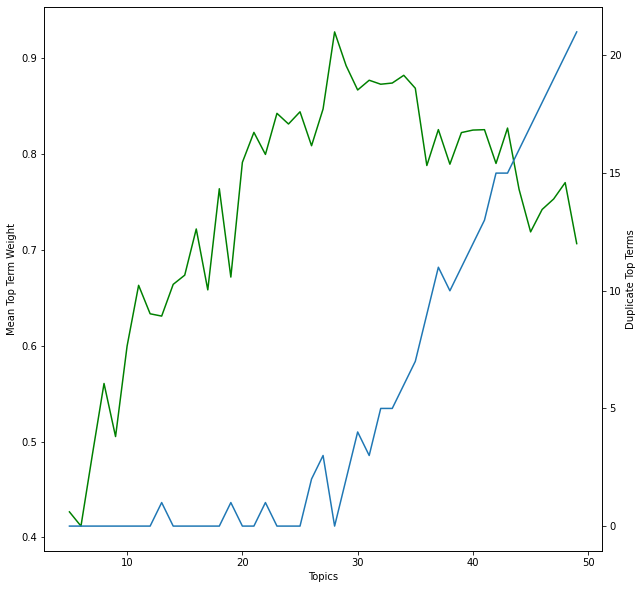

In [ ]:
plt.figure(figsize=(10,10))
sea.lineplot(data=tcs,x='Topics',y='Mean Top Term Weight',color='g')
ax2=plt.twinx()
sea.lineplot(data=tcs,x='Topics',y='Duplicate Top Terms',ax=ax2)

In [ ]:
#Set up a Dataframe to evaluate Sparsity of Document Topic Matrx
dtm_temp = pd.DataFrame(columns=np.arange(0,28,1))

In [ ]:
#Calculate Sparsity proportion of Document Topic Matrix 
for i in range(0,len(corpus)):
  print(i)
  doctopics = int_model.get_document_topics(corpus[i])
  for j in range(0,len(doctopics)):
    dtm_temp.loc[i,doctopics[j][0]] = doctopics[j][1]
    
dtm_temp = dtm_temp.fillna(0)
sparseval=(dtm_temp.values==0).sum()
sp = sparseval/(dtm_temp.shape[0]*dtm_temp.shape[1])

print(sp)

Streaming output truncated to the last 5000 lines.
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
18589
18590
18591
18592
18593
18594
18595
18596
18597
18598
18599
18600
18601
18602
18603
18604
18605
18606
18607
18608
18609
18610
18611
18612
18613
18614
18615
18616
18617
18618
18619
18620
18621
18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
1

In [ ]:
#Find Best Number of Topics for the FInal NMF Model
best_num_topics=28
final_model = Nmf(corpus=corpus,num_topics=best_num_topics,id2word=dictionary,random_state=randomstate,w_max_iter=1000,
                      h_max_iter=1000,w_stop_condition=0.001,h_stop_condition=0.001,normalize=True)

In [ ]:
#Print Topics and their Top Word
topicnums=[]
topicwordlist=[]

for i in range(0,best_num_topics):
  print("\nTopic {}".format(i))
  topicnums.append(i)
  topic = final_model.show_topic(topicid=i,topn=1)
  
  topicwords=[]

  for j in range(0,len(topic)):
    topicwords.append(topic[j][0])

  topicwordlist.append(topicwords)

  print(topicwords)


Topic 0
['iq']

Topic 1
['business']

Topic 2
['data']

Topic 3
['us']

Topic 4
['distribution']

Topic 5
['books']

Topic 6
['correlation']

Topic 7
['syria']

Topic 8
['paper']

Topic 9
['ny']

Topic 10
['monsanto']

Topic 11
['world']

Topic 12
['money']

Topic 13
['language']

Topic 14
['aramaic']

Topic 15
['lebanon']

Topic 16
['book']

Topic 17
['math']

Topic 18
['risk']

Topic 19
['twitter']

Topic 20
['probability']

Topic 21
['history']

Topic 22
['levantine']

Topic 23
['tails']

Topic 24
['science']

Topic 25
['variance']

Topic 26
['life']

Topic 27
['skin game']


In [ ]:
#Combine topic numbers with their workds
topicmap = list(zip(topicnums,topicwordlist))

In [ ]:
#Prepare Document Topic Matrix
dtmcols=list(np.arange(0,best_num_topics,1))
dtmcols.insert(0,'index')
dtm = pd.DataFrame(columns=dtmcols)
dtm['index'] = processed_doc_final['index']
dtm

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23478,23478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23479,23479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23480,23480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23481,23481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Print Document Topic Matrix
for i in range(0,len(corpus)):
  doctopics = final_model.get_document_topics(corpus[i])
  for j in range(0,len(doctopics)):
    dtm.loc[i,doctopics[j][0]] = doctopics[j][1]

dtm

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23478,23478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23479,23479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23480,23480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23481,23481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dtm = dtm.fillna(0)
dtm

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23478,23478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23479,23479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23480,23480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23481,23481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Add Tweet & Timestamp to the Document Topic Matrix
tweetstopicstemp = dtm.merge(processed_doc_final[['Date','Content','index']],how='inner',left_on='index',right_on='index').drop(columns='index')
tweetstopics = tweetstopicstemp.merge(tweet_contents[['date','content']],how='inner',left_on='Date',right_on='date').drop(columns=['Content','date'])
scol = tweetstopics.pop('content')
dcol = tweetstopics.pop('Date')
tweetstopics.insert(0,'Tweet',scol)
tweetstopics.insert(0,'Date',dcol)
tweetstopics.head(100)

,Date,Tweet,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,2016-04-23 17:34:24+00:00,Via negativa stop the carbs particularly sugar fast rather than all these pills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,2016-04-23 17:55:48+00:00,El roube wellgha el rabiyye killa tezwir tari El shami ligha lawa a bte ab el rabe wel arame yzin niktub kitub fiya latballesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,2016-04-23 17:58:28+00:00,mitlma el telyene ballash bi Dante yzin da yektub adab bil shami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,2016-04-23 18:05:00+00:00,The reason people use English is because Arabic feels strange foreign archaic amp underdeveloped,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,2016-04-23 18:11:59+00:00,La2 Sa id kl kan ma our billebnene Ana bilshami ye 3 el suriyye se r el mashre2 bima biyon el daffe elgharbiyye,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
5,2016-04-23 18:12:21+00:00,m bneshtghl aya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
6,2016-04-23 18:14:17+00:00,Not lebantine just lebanese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7,2016-04-23 18:14:46+00:00,el wazze el sawda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
8,2016-04-23 18:15:33+00:00,OK OK Killkun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9,2016-04-23 18:16:32+00:00,Bildaffe elshariyye biye o a ab l hijazi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [ ]:
#Print Topics and related top words as DataFrame
topicdf=pd.DataFrame(topicmap)
topicdf=topicdf.drop(columns=0)
topicdf['Topic'] = topicdf[1].apply(lambda x: ''.join(x))
topicdf['Topic'] = topicdf['Topic'].str.capitalize()
topicdf = topicdf.drop(columns=1)
topicdf

,Topic
0,Iq
1,Business
2,Data
3,Us
4,Distribution
5,Books
6,Correlation
7,Syria
8,Paper
9,Ny


In [ ]:
#Fetch Tweets which have a >50% representation by the selected topic 
topicnumber=14
pd.DataFrame(tweetstopics[tweetstopics[topicnumber]>=0.5]).sort_values(by=topicnumber,ascending=False)  

NameError: ignored

In [ ]:
#Replace Topic IDs with Topic words in the Document Topic Matrix
finalcols=topicdf['Topic'].to_list()
finalcols.insert(0,'Date')
finalcols.insert(1,'Tweet')
finaltopics = tweetstopics.copy()
finaltopics.columns=finalcols
finaltopics

,Date,Tweet,Iq,Business,Data,Us,Distribution,Books,Correlation,Syria,Paper,Ny,Monsanto,World,Money,Language,Aramaic,Lebanon,Book,Math,Risk,Twitter,Probability,History,Levantine,Tails,Science,Variance,Life,Skin game
0,2016-04-23 17:34:24+00:00,Via negativa stop the carbs particularly sugar fast rather than all these pills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-04-23 17:55:48+00:00,El roube wellgha el rabiyye killa tezwir tari El shami ligha lawa a bte ab el rabe wel arame yzin niktub kitub fiya latballesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-04-23 17:58:28+00:00,mitlma el telyene ballash bi Dante yzin da yektub adab bil shami,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-04-23 18:05:00+00:00,The reason people use English is because Arabic feels strange foreign archaic amp underdeveloped,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-04-23 18:11:59+00:00,La2 Sa id kl kan ma our billebnene Ana bilshami ye 3 el suriyye se r el mashre2 bima biyon el daffe elgharbiyye,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23500,2021-12-21 13:27:45+00:00,resent the Taleb Twitter designation as if were involved or these pple were representative resent people on that group who were unaware that principally one must control tail risk before talking about antifragility The latter concept attracted too many psychopaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23501,2021-12-21 13:39:19+00:00,am NOT interested in being an involuntary common node to group of people who do not share my values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23502,2021-12-21 14:40:17+00:00,YEAR IN REVIEW Where discover that weightlifting alone is not good for you Added minutes of Zone week with yuuuge results,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23503,2021-12-21 15:09:15+00:00,Not Z2 though,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_model.get_topic_terms(topicid=2)

In [ ]:
# from google.colab import drive

# drive.mount('/content/gdrive')

# dtm.to_csv('dtm.csv')